# 8. 그래프 만들기
- <b>데이터를 시각화하는 이유</b>
    - 원본 데이터나 통계표는 수많은 문자와 숫자로 이루어져 있어서 내용 파악이 어렵다. 하지만 데이터를 그래프로 시각화하면 추세와 경향성이 드러나기 때문에 특징을 쉽게 이해할 수 있고, 시각화 과정에서 새로운 패턴을 발견하기도 하기 때문에 데이터를 시각화한다.
- <b>seaborn 관련 메소드, 속성들 꼼꼼히 살펴보기</b>
    - set(xlim = [3, 6]) # x축의 범위 3~6으로 제한
    - set(xlim = [3, 6], ylim = [10,30]) # x축의 범위 3~ 6, y축의 범위 10~30으로 제한
    - hue(색조)를 이용하면 종류별로 색깔을 다르게 표현할 수 있음(ex: hue='drv') # drv(구동 방식)에 따라 색깔을 다르게 표현<br>
            - sns.scatterplot(data = mpg, x = 'displ', y = 'hwy', hue = 'drv').set(xlim = [3, 6])<br>
    - 막대 정렬하고 싶으면 order를 이용하여 원하는 순서로 값을 입력할 수 있음
        - sns.countplot(data = mpg, x = 'drv', order=['4', 'f', 'r'])
- <b>seaborn 패키지에서 표현할 수 있는 그래프 4가지 이상 쓰고, 각각의 특징을 쓰시오.</b>
    - 산점도: 데이터를 x축과 y축에 점으로 표현한 그래프, 예를 들어, 나이와 소득처럼 연속값으로 된 두 변수의 관계를 표현할 때 사용
        - <b>sns.scatterplot(data, x, y, [hue])</b>
        - 상향 또는 하향(/ or \)일수록 상관성이 높고, 평행한 직선(-)의 형태일수록 상관성이 없다.
    - 평균 막대 그래프: 평균값의 크기를 막대 길이로 표현한 그래프, 여러 집단의 평균 값을 비교할 때 자주 사용
        - groupby('컬럼명', as_index=False).agg(파생변수명=('컬럼명', '통계함수')) 후 사용, <b>그래프로 나타낼 땐 항상 as_index=False</b>
        - <b>sns.boxplot(data, x, y)</b>
    - 빈도 막대 그래프: 값의 빈도를 막대 길이로 표현한 그래프, 여러 집단의 빈도를 비교할 때 자주 사용 ~ y값이 필요 없음
        - <b>sns.countplot(data, x, [order])</b>
        - 빈도가 높은 순으로 정렬하고 싶으면 ordef = df['column'].value_counts().index 를 넣으면 된다!
        - ex: sns.countplot(data = mpg, x = 'drv', order = mpg['drv'].value_counts().index)
    - 시계열 그래프: 시간에 따라 데이터가 바뀌는 시계열 데이터를 표현한 그래프, 시간에 따라 어떻게 데이터가 변해 왔는지 알아보고자 할 때 사용
        - <b>sns.lineplot(data, x, y, [ci])</b> # x축에는 시간
        - 날짜 시간 타입 변수를 만들기 위해서는 pd.to_datetime()을 활용하여 데이터 타입을 바꿔야 함
        - ex: economics['date2'] = pd.to_datetime(economics['date']) # object to datetime64
        - 신뢰구간(confidence interval)을 표시하지 않으려면 ci = None 을 입력하면 됨
    - 상자 그림: 데이터의 분포를 직사각형 상자 모양으로 표현한 그래프, 데이터의 분포와 이상치를 확인할 때 주로 사용
        - <b>sns.boxplot(data, x, y)</b>
    
<br>
- <b>상자그림 해석하기</b>

|상자 그림|값|설명|
|:--:|:--:|:--:|
|상자 아래 세로선|아랫수염|하위 0~25% 내에 해당하는 값|
|상자 밑면|1사분위수(Q1)|하위 25%위치 값|
|상자 내 굵은 선|2사분위수(Q2)|하위 50%위치 값|
|상자 윗면|3사분위수(Q3)|하위 75%위치 값|
|상자 위 세로선|윗수염|하위 75~100% 내에 해당하는 값|
|상자 밖 가로선|극단치 경계|Q1, Q3 밖 1.5 * IQR 내 최대값|
|상자 밖 점 표식|극단치|Q1, Q3 밖 1.5 * IQR을 벗어난 값|

- 주의할 문법
    - df_mpg = df_mpg.sort_values('mean_hwy', ascending = False) # 변수에 할당까지 해줘야 함, 정렬 기본값: 오름차순(asc)
    - df.value_counts().index: 빈도가 높은 순으로 변수의 값을 출력하는 기능
    - df.unique(): 변수의 고유값을 출력, 값의 순서를 알 수 있음

In [11]:
import pandas as pd
mpg = pd.read_csv('../Data/mpg.csv')

## 산점도

<Axes: xlabel='displ', ylabel='hwy'>

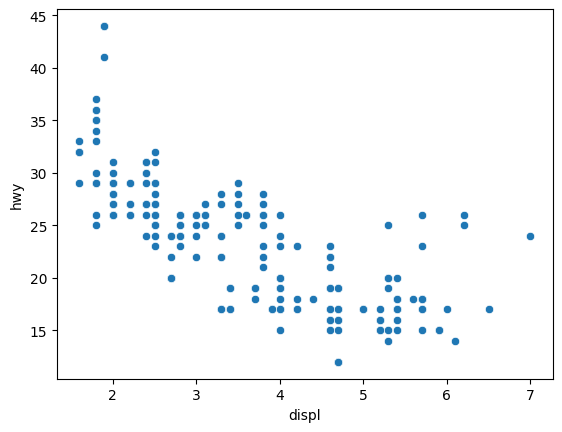

In [12]:
import seaborn as sns
sns.scatterplot(data=mpg, x='displ', y='hwy') # x축은 배기량, y축은 고속도로 연비

[(3.0, 6.0)]

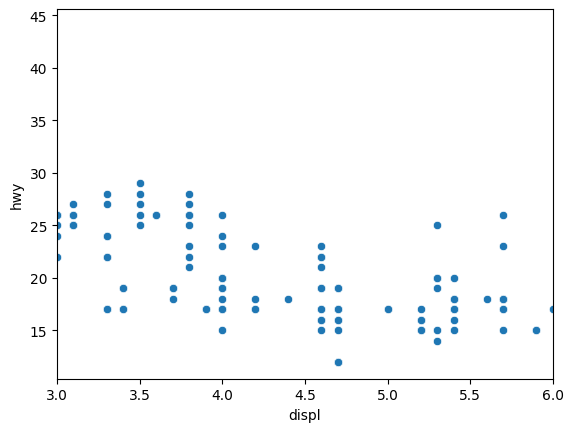

In [15]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy') \
    .set(xlim = (3, 6)) # x축의 범위 3 ~ 6으로 제한

[(3.0, 6.0), (10.0, 30.0)]

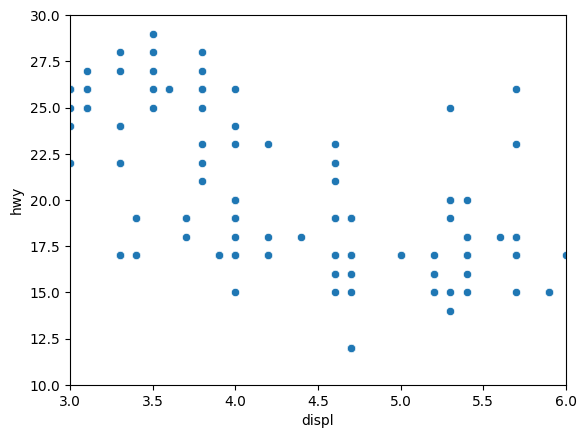

In [16]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy') \
    .set(xlim = [3, 6], ylim = (10, 30)) # []와 () 둘다 사용 가능
# x축의 범위는 3~6, y축의 범위는 10~30

[(3.0, 6.0), (10.0, 30.0)]

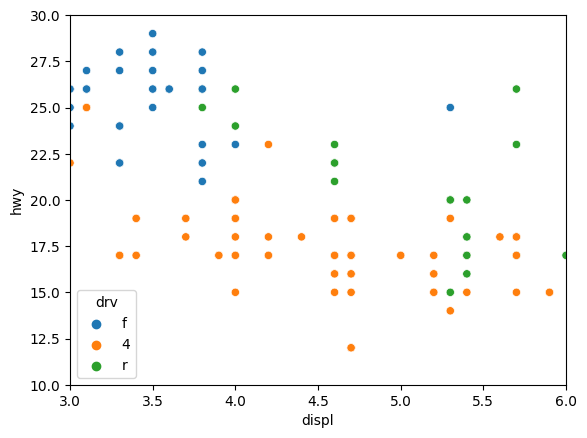

In [9]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy', hue='drv') \
    .set(xlim = (3, 6), ylim = (10, 30)) # x축의 범위는 3~6, y축의 범위는 10~30, 구동방식에 따라 마커의 색깔을 다르게 표현

<Axes: xlabel='displ', ylabel='hwy'>

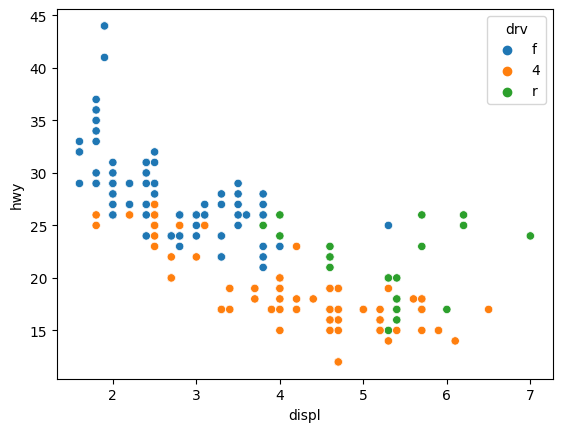

In [10]:
sns.scatterplot(data=mpg, x = 'displ', y='hwy', hue='drv')

### 혼자서 해보기

<Axes: xlabel='cty', ylabel='hwy'>

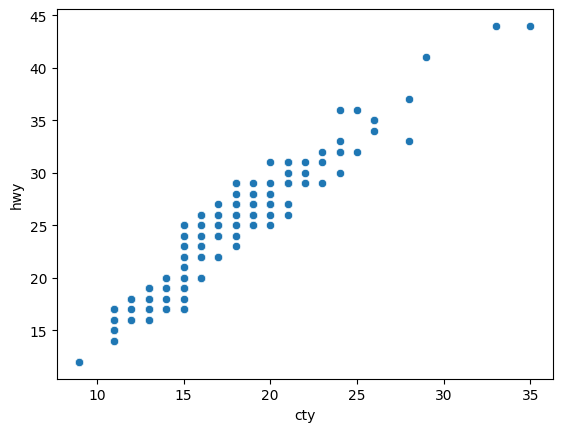

In [17]:
# Q1. mpg 데이터의 cty(도시 연비)와 hwy(고속도로 연비) 간에 어떤 관계가 있는지 알아보고자 할 때,
#     x축은 cty, y축은 hwy로 된 산점도를 나타내면?
sns.scatterplot(data=mpg, x='cty', y='hwy')

[(0.0, 500000.0), (0.0, 10000.0)]

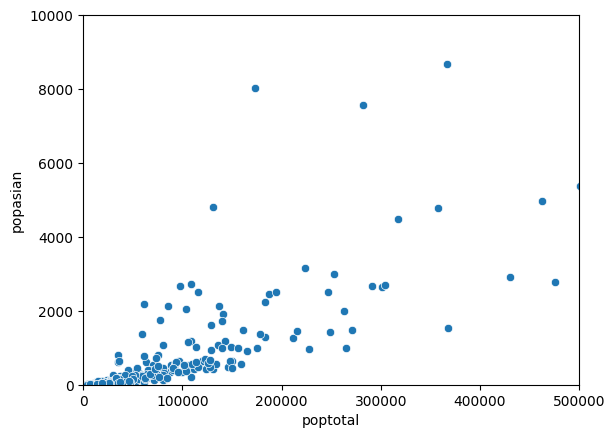

In [19]:
# Q2. 미국의 지역별 인구통계 정보를 담은 midwest.csv를 이용해 전체 인구와 아시아인 인구 간에 어떤 관계가 있는지 알아보려고 한다.
#     x축은 poptotal(전체 인구), y축은 popasian(아시아인 인구)으로 된 산점도를 만들어 보자.
#     단, 전체 인구는 50만 명 이하, 아시아인 인구는 1만 명 이하인 지역만 산점도에 표시되게 설정하자.
population_midwest = pd.read_csv('../Data/midwest.csv')
sns.scatterplot(data=population_midwest, x='poptotal', y='popasian') \
    .set(xlim = (0, 500000), ylim = (0, 10000))

## 막대 그래프
- 평균 막대 그래프: 평균값의 크기를 막대 길이로 표현한 그래프
    - barplot
- 빈도 막대 그래프: 값의 빈도(개수)를 막대 길이로 표현한 그래프
    - barplot / countplot
- y축이 평균 or 빈도

In [20]:
# 평균 막대 그래프 그리기
df_mpg = mpg.groupby('drv') \
            .agg(mean_hwy = ('hwy', 'mean'))

# groupby에 as_index 값을 False로 주지 않으면 아래와 같이 그룹을 나누는 대상이 인덱스가 됨
df_mpg

,mean_hwy
drv,
4,19.174757
f,28.160377
r,21.000000


In [21]:
df_mpg = mpg.groupby('drv', as_index=False) \
            .agg(mean_hwy = ('hwy', 'mean'))

# 막대 그래프를 그리기 위해서는 groupby에 as_index=False로 주어야 함
df_mpg

,drv,mean_hwy
0,4,19.174757
1,f,28.160377
2,r,21.000000


<Axes: xlabel='drv', ylabel='mean_hwy'>

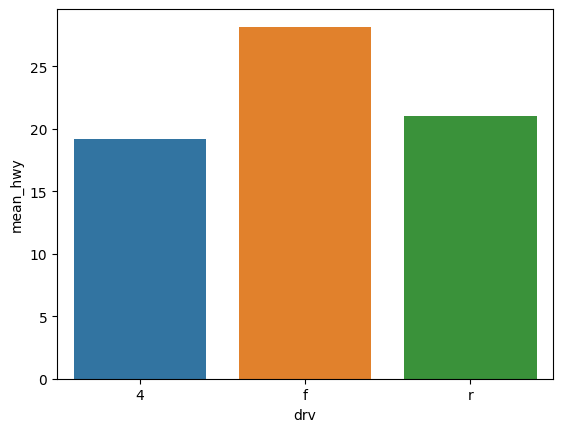

In [22]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

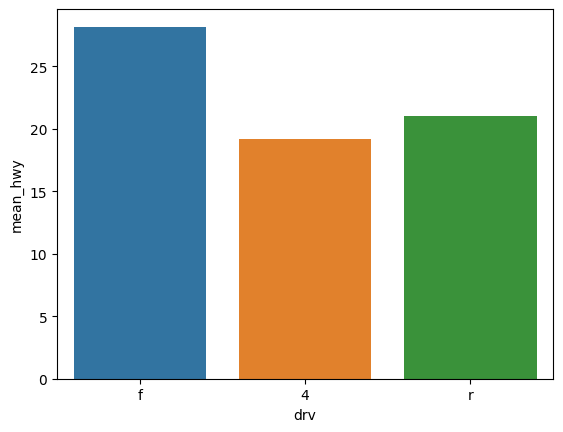

In [31]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy', order=['f','4','r'])
# barplot의 인자에 order를 활용해서 마음대로 그래프의 순서를 바꿀 수 있다.

<Axes: xlabel='drv', ylabel='mean_hwy'>

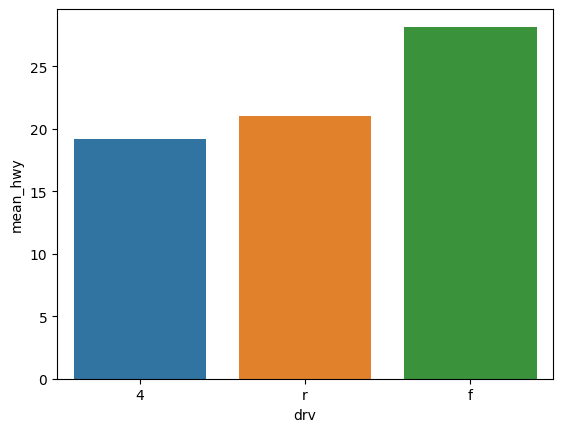

In [23]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy', order=['4','r','f'])
# barplot의 인자에 order를 활용해서 마음대로 그래프의 순서를 바꿀 수 있다.

<Axes: xlabel='drv', ylabel='mean_hwy'>

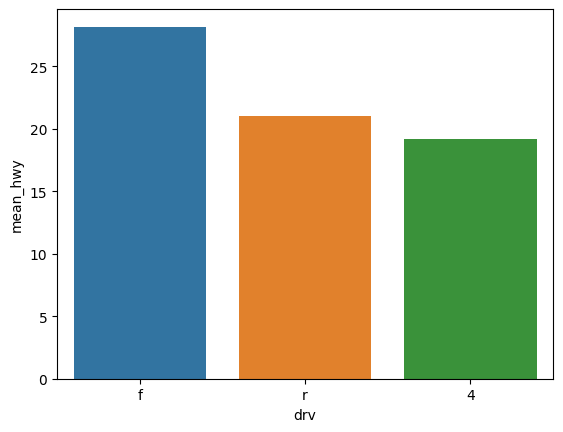

In [26]:
df_mpg = df_mpg.sort_values('mean_hwy', ascending=False) # df_mpg에 대해서 내림차순 정렬 실시
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

In [27]:
# 빈도 막대 그래프 그리기 (barplot, countplot 둘 다 가능)
df_mpg = mpg.groupby('drv', as_index=False) \
            .agg(n = ('drv', 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='n'>

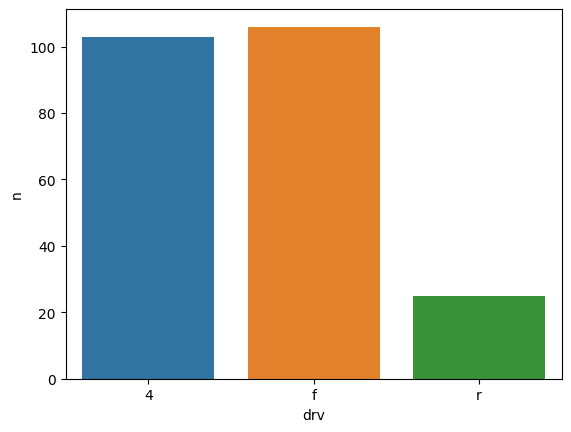

In [28]:
sns.barplot(data=df_mpg, x='drv', y='n', order=['4', 'f', 'r'])

<Axes: xlabel='drv', ylabel='count'>

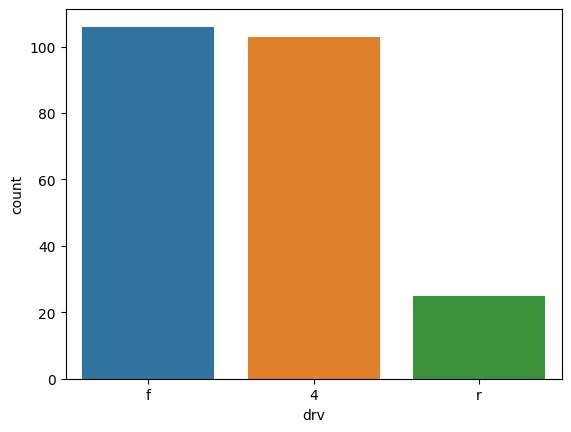

In [30]:
sns.countplot(data=mpg, x='drv')
# countplot()을 이용하면 df.groupby()와 df.agg()를 이용해 집단별 빈도표를 만드는 작업을 생략할 수 있음
# 즉, 데이터 원본을 이용해 바로 빈도 막대 그래프를 그릴 수 있음

In [32]:
print(mpg['drv'].unique()) # 값의 순서가 아직 정렬되지 않은 상황
print(df_mpg['drv'].unique()) # 값의 순서가 오름차순(알파벳순)으로 정렬된 상황

['f' '4' 'r']
['4' 'f' 'r']


<Axes: xlabel='drv', ylabel='count'>

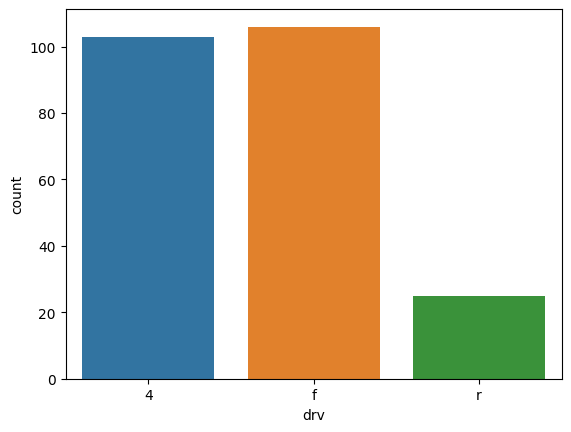

In [17]:
sns.countplot(data=mpg, x='drv', order=['4', 'f', 'r'])

<Axes: xlabel='drv', ylabel='count'>

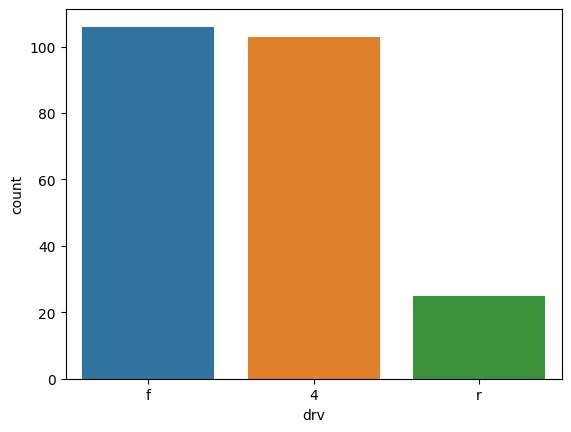

In [34]:
sns.countplot(data=mpg, x='drv', order=mpg['drv'].unique())

In [37]:
mpg['drv'].value_counts() # drv의 값을 빈도가 높은 순서대로 출력

drv
f    106
4    103
r     25
Name: count, dtype: int64

In [38]:
mpg['drv'].value_counts().index # drv의 빈도가 높은 순서대로 index의 값을 출력

Index(['f', '4', 'r'], dtype='object', name='drv')

<Axes: xlabel='drv', ylabel='count'>

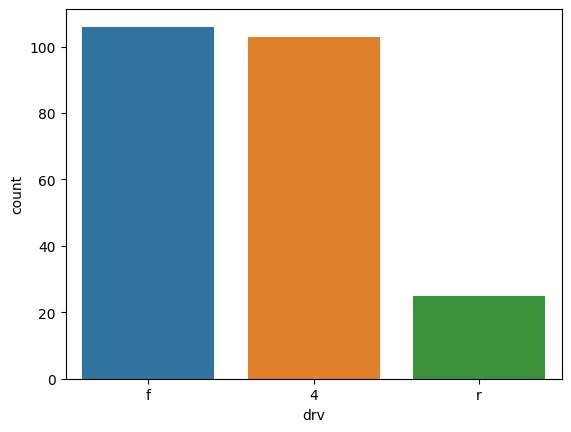

In [40]:
sns.countplot(data=mpg, x='drv', order=mpg['drv'].value_counts().index)
# 위와 같이 value_counts().index를 order에 대입하여 사용할 수도 있음

<Axes: xlabel='drv', ylabel='count'>

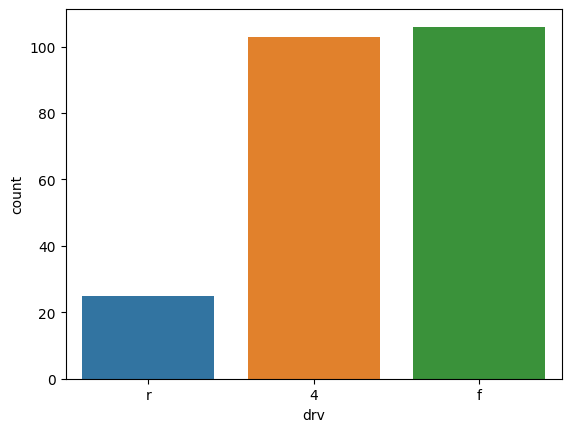

In [46]:
sns.countplot(data=mpg, x='drv', order=mpg['drv'].value_counts().sort_values().index)
# sort_values()의 기본값은 ascending이 True이므로 오름차순 정렬

### 혼자서 해보기

In [49]:
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


  manufacturer   mean_cty
8       subaru  18.833333
9       toyota  14.375000
7       nissan  13.750000
3         jeep  13.500000
6      mercury  13.250000


<Axes: xlabel='manufacturer', ylabel='mean_cty'>

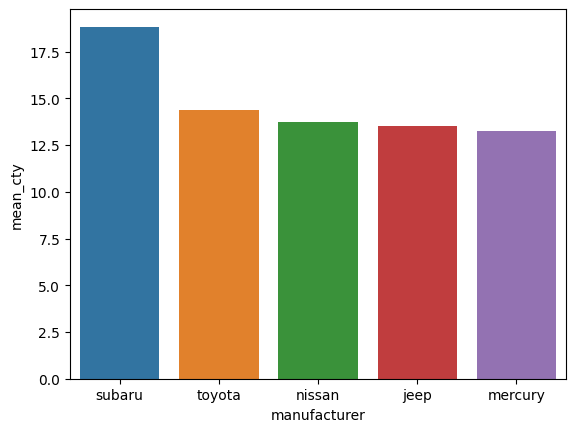

In [62]:
# Q1. 어떤 회사에서 생산한 'suv' 차종의 도시 연비가 높은지 알아보고자 함.
#     'suv' 차종을 대상으로 cty(도시 연비) 평균이 가장 높은 회사 다섯 곳을 막대 그래프로 표현해 보자.(단, 막대는 연비가 높은 순서로 정렬)
mpg = pd.read_csv('../Data/mpg.csv')

q1_mpg = mpg.query('category == "suv"') \
            .groupby('manufacturer', as_index=False) \
            .agg(mean_cty = ('cty', 'mean')) \
            .sort_values('mean_cty', ascending = False) \
            .head()

print(q1_mpg)
sns.barplot(data = q1_mpg, x='manufacturer', y='mean_cty')

<Axes: xlabel='category', ylabel='count_category'>

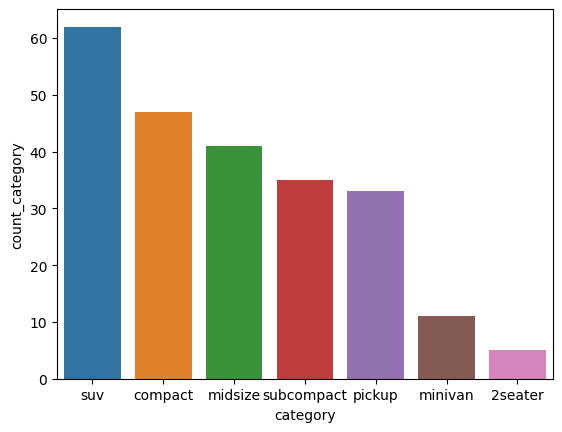

In [71]:
# Q2. 자동차 중에 어떤 category(자동차 종류)가 많은지 알아보려고 한다.
#     sns.barplot()을 이용해 자동차 종류별 빈도를 표현한 막대 그래프를 만들어 보자.
#     단, 막대는 빈도가 높은 순으로 정렬하자.

q2_mpg = mpg.groupby('category', as_index=False) \
            .agg(count_category = ('category', 'count')) \
            .sort_values('count_category', ascending=False)

sns.barplot(q2_mpg, x='category', y='count_category')

<Axes: xlabel='category', ylabel='count'>

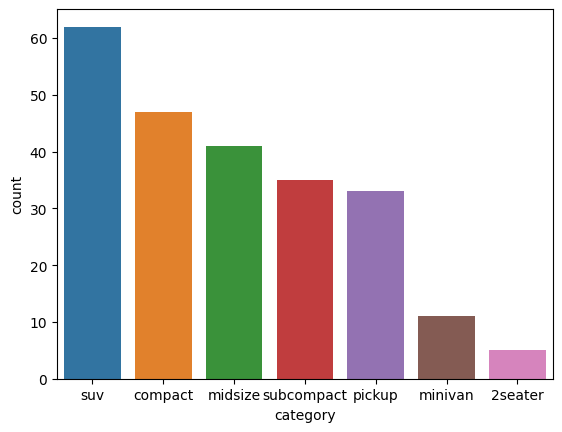

In [68]:
# Q3. 자동차 중에 어떤 category(자동차 종류)가 많은지 알아보려고 한다.
#     sns.countplot()을 이용해 자동차 종류별 빈도를 표현한 막대 그래프를 만들어 보자.
#     단, 막대는 빈도가 높은 순으로 정렬하자.

sns.countplot(data=mpg, x='category', order=mpg['category'].value_counts().index)

## 시계열 그래프(선 그래프)
- lineplot

In [73]:
economics = pd.read_csv('../Data/economics.csv')
economics.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


<Axes: xlabel='date', ylabel='unemploy'>

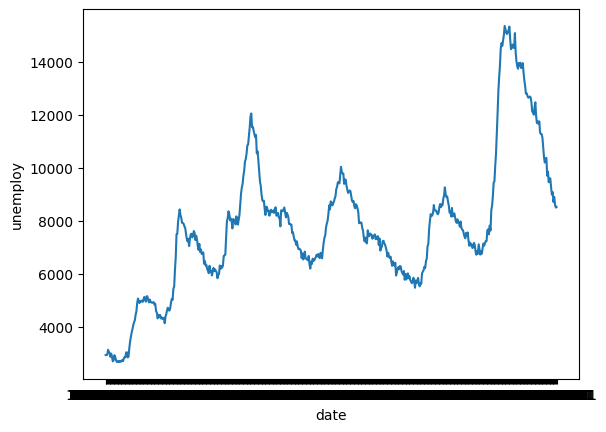

In [75]:
sns.lineplot(data = economics, x='date', y='unemploy') # x축은 시간, y축은 실업자 수

In [76]:
economics['date2'] = pd.to_datetime(economics['date']) # 변수의 타입을 날짜 시간 타입으로 바꿈

economics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [78]:
economics[['date', 'date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [79]:
economics['date2'].dt.year

0      1967
1      1967
2      1967
3      1967
4      1967
       ... 
569    2014
570    2015
571    2015
572    2015
573    2015
Name: date2, Length: 574, dtype: int32

In [80]:
economics['date2'].dt.month

0       7
1       8
2       9
3      10
4      11
       ..
569    12
570     1
571     2
572     3
573     4
Name: date2, Length: 574, dtype: int32

In [81]:
economics['date2'].dt.day

0      1
1      1
2      1
3      1
4      1
      ..
569    1
570    1
571    1
572    1
573    1
Name: date2, Length: 574, dtype: int32

In [82]:
economics['year'] = economics['date2'].dt.year
economics.head()

,date,pce,pop,psavert,uempmed,unemploy,date2,year
0,1967-07-01,506.7,198712.0,12.6,4.5,2944,1967-07-01,1967
1,1967-08-01,509.8,198911.0,12.6,4.7,2945,1967-08-01,1967
2,1967-09-01,515.6,199113.0,11.9,4.6,2958,1967-09-01,1967
3,1967-10-01,512.2,199311.0,12.9,4.9,3143,1967-10-01,1967
4,1967-11-01,517.4,199498.0,12.8,4.7,3066,1967-11-01,1967


<Axes: xlabel='year', ylabel='unemploy'>

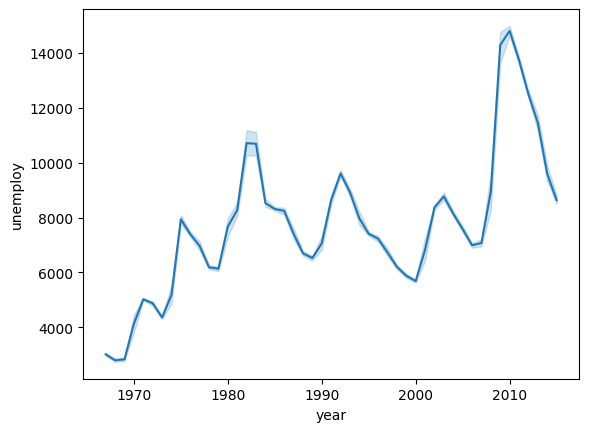

In [83]:
sns.lineplot(data=economics, x='year', y='unemploy')

/var/folders/23/n8c37q85651bywf1rz00z90c0000gn/T/ipykernel_15457/3974334394.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=economics, x='year', y='unemploy', ci=None)


<Axes: xlabel='year', ylabel='unemploy'>

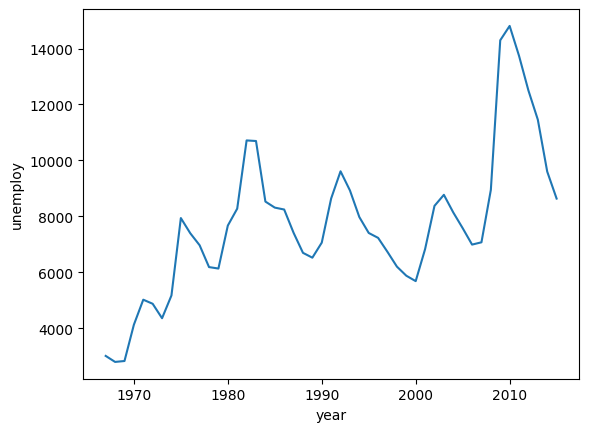

In [84]:
sns.lineplot(data=economics, x='year', y='unemploy', ci=None)

<Axes: xlabel='year', ylabel='psavert'>

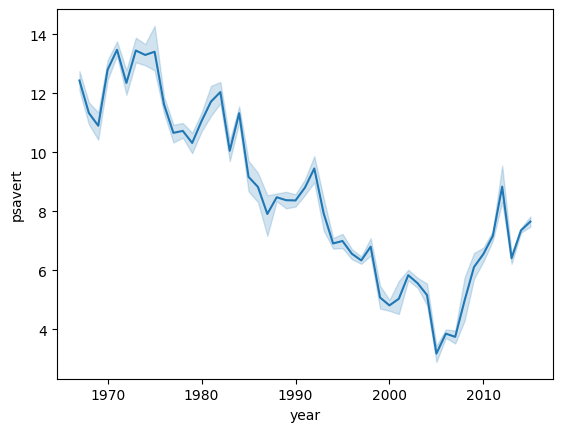

In [91]:
# Q1. psavert(개인 저축률)가 시간에 따라 어떻게 변해 왔는지 알아보고자 한다.
#     연도별 개인 저축률의 변화를 나타낸 시계열 그래프를 만들자.

economics['date3'] = pd.to_datetime(economics['date'])
# 암기하자: pd.to_datetime(df['date 열'])

year = economics['date3'].dt.year
sns.lineplot(data = economics, x = 'year', y = 'psavert')

<Axes: xlabel='month', ylabel='psavert'>

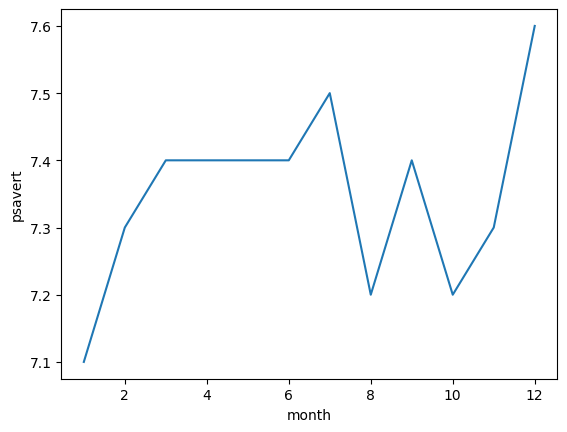

In [94]:
# Q2. 2014년 월별 psavert의 변화를 나타낸 시계열 그래프를 만들어 보자.

economics['month'] = economics['date2'].dt.month # 먼저, '월'을 나타낸 변수를 만든다.
economics_14 = economics.query('year == 2014') # 다음으로 df.query()을 이용하여 2014년의 데이터만 추출한다.
sns.lineplot(data = economics_14, x='month', y='psavert') # 구한 값을 활용하여 시계열 그래프를 그린다.

## 상자 그림(집단 간 분포 차이 표현하기)
- boxplot

<Axes: xlabel='drv', ylabel='hwy'>

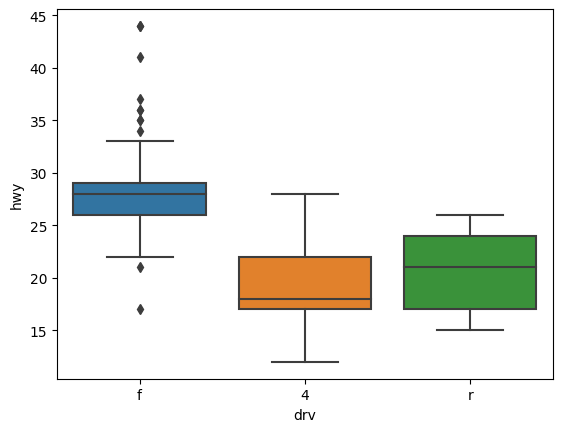

In [95]:
sns.boxplot(data = mpg, x = 'drv', y = 'hwy') # 구동 방식별 고속도로 연비의 상자 그림

<Axes: xlabel='category', ylabel='cty'>

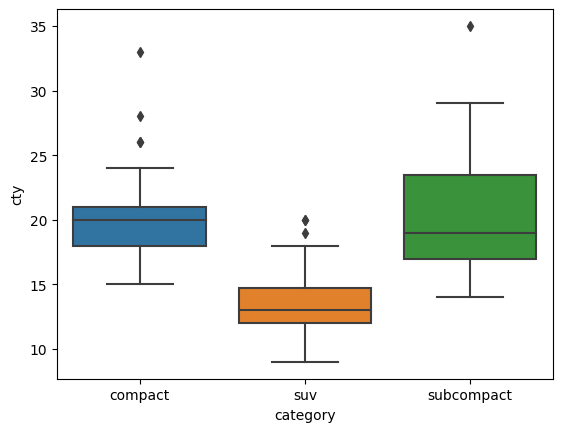

In [96]:
# Q1. category(자동차 종류)가 'compact', 'subcompact', 'suv'인 자동차의 cty(도시 연비)가 어떻게 다른지 분포를 비교하고자 함
#     세 차종의 cty를 나타낸 상자 그림을 그려보자.

new_mpg = mpg.query('category in ["compact", "subcompact", "suv"]')
sns.boxplot(data=new_mpg, x='category', y='cty')